
# **SHOPPER SPECTRUM: E-COMMERCE CUSTOMER SEGMENTATION & RECOMMENDATION SYSTEM**
### **Project type:** EDA, Clustering and Collaborative Filtering
### **Name:** Shruti Katiyar
### **Date:** August 2025

# **Project Summary**

Shopper Spectrum is an end-to-end e-commerce analytics solution that leverages unsupervised learning and collaborative filtering to drive personalized customer experiences. Using real transaction data, the system performs RFM (Recency, Frequency, Monetary) analysis to segment customers into actionable groups—High-Value, Regular, Occasional, and At-Risk—enabling targeted marketing and retention strategies. A KMeans clustering model identifies behavioral patterns, while an item-based collaborative filtering engine recommends similar products using cosine similarity on purchase co-occurrence.

The solution is deployed as a responsive Streamlit dashboard, offering two core modules: real-time customer segmentation prediction and product recommendations. Built with scalability in mind, the pipeline includes robust data cleaning, feature engineering, model evaluation, and interactive visualizations. This project empowers e-commerce platforms to enhance engagement, optimize inventory, and increase conversion through data-driven personalization. Designed for production use, it follows software engineering best practices and delivers actionable business intelligence.

# **Github Link**

# **Problem Statement**

- The e-commerce industry collects vast transactional data but often fails to extract actionable customer insights.
- Lack of customer segmentation leads to inefficient marketing campaigns and poor personalization.
- Businesses struggle to identify high-value customers or those at risk of churn.
- Generic product recommendations result in lower engagement and conversion rates.
- Inventory and pricing strategies are often not aligned with actual customer demand patterns.
- There is a need for a unified system that combines customer behavior analysis with intelligent recommendations in real time.

# **Code Implementation**

## *Step 1: Install & Import Dependencies*

In [ ]:
# ================================
# INSTALL & UPGRADE CORE PACKAGES
# ================================

# Upgrade essential scientific computing libraries to latest stable versions
# Ensures compatibility and access to latest bug fixes and features
!pip install --upgrade numpy scipy

# ================================
# INSTALL PROJECT DEPENDENCIES
# ================================

# Data manipulation and analysis
!pip install pandas

# Data visualization
!pip install matplotlib seaborn

# Machine learning toolkit
!pip install scikit-learn

# Interactive web app framework for ML/Dashboards
!pip install streamlit

# Enhanced visualization for scikit-learn models (e.g., ROC curves, confusion matrices)
!pip install scikit-plot

# Automated exploratory data analysis (EDA) reports
!pip install pandas-profiling

# Tool for creating secure tunnels to localhost (useful for deploying Streamlit apps via ngrok)
!pip install pyngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 48.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 47.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 262.6/262.6 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 77.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.4/102.4 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.8/309.8 kB 30.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.0/679.0 kB 27.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 23.4 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=65c91492910a01cd0388044641a399203454c576c738727cf49bdb1ca062cd8c
  Stored in 

## *Step 2: Import Libraries*

In [ ]:
# IMPORT LIBRARIES
# ========================================
# Data Manipulation & Analysis
# -------------------------------
import pandas as pd            # For data manipulation and DataFrame handling
import numpy as np             # For numerical computations and array operations

# Data Visualization
import matplotlib.pyplot as plt  # For basic plotting
import seaborn as sns            # For enhanced statistical visualizations

# Date & Time Handling
from datetime import datetime    # For handling timestamp data
from datetime import timedelta   # For time-based calculations (e.g., customer recency)

# Machine Learning (Scikit-learn)
from sklearn.preprocessing import StandardScaler  # For feature scaling before clustering
from sklearn.cluster import KMeans                # K-Means algorithm for customer segmentation
from sklearn.metrics import silhouette_score      # To evaluate clustering performance

# Model Persistence
import joblib                    # For saving and loading trained models (efficient and secure)

# Streamlit (Web App Framework)
import streamlit as st           # To build and deploy interactive web apps

# Google Colab Integration
from google.colab import files   # To enable file upload/download in Colab environment
import os                        # For interacting with the operating system (e.g., file paths, environment checks)

## *Step 3: Load Dataset*

In [ ]:
# ========================================
# DATA LOADING: ONLINE RETAIL DATASET
# ========================================

#  Define the expected file path
file_path = 'online_retail.csv'
"""
This is the target filename expected by the application.
- If the file exists locally, it will be loaded directly.
- If not, the system triggers a file upload (in Google Colab).
- Ensures consistent naming for downstream processing.
"""


def load_data():
    """
    Load the online retail dataset with fallback to user upload.

    Returns:
        pd.DataFrame: The loaded dataset.

    Behavior:
        1. Checks if 'online_retail.csv' exists locally.
        2. If yes → loads it using Latin-1 encoding (required for this dataset).
        3. If not → prompts user to upload via Colab's file uploader.
        4. Handles case where uploaded file has a different name by renaming it.
    """
    if os.path.exists(file_path):
        # File exists locally – load directly
        print(f"Loading dataset from local file: {file_path}")
        df = pd.read_csv(file_path, encoding='latin1')
    else:
        # File not found → trigger upload in Google Colab
        print("File not found locally. Uploading...")
        uploaded = files.upload()  # Displays upload widget in Colab

        # Handle potential mismatch in uploaded filename
        if file_path not in uploaded:
            # User may have uploaded with a different name (e.g., 'Online_Retail.csv')
            file_key = list(uploaded.keys())[0]  # Get the actual uploaded filename
            os.rename(file_key, file_path)       # Rename it to match expected path
            print(f"Renamed uploaded file '{file_key}' to '{file_path}' for consistency.")

        # Load the CSV with proper encoding (Latin-1 avoids Unicode errors in this dataset)
        df = pd.read_csv(file_path, encoding='latin1')

    return df


#  Execute data loading
df = load_data()
print("Dataset loaded successfully.")
df.head()

Loading dataset from local file: online_retail.csv
Dataset loaded successfully.


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom


## *Step 4: Data Preprocessing*

In [ ]:
# ========================================
# DATA PREPROCESSING FUNCTION
# ========================================

def preprocess_data(df: pd.DataFrame) -> pd.DataFrame:
    """
    Clean and preprocess the raw online retail transaction data.

    This function prepares the dataset for customer segmentation (e.g., RFM analysis)
    by removing invalid, incomplete, or irrelevant records and engineering key features.

    Parameters:
        df (pd.DataFrame): Raw transaction-level data with columns including
                           CustomerID, InvoiceNo, Quantity, UnitPrice, InvoiceDate

    Returns:
        pd.DataFrame: Cleaned and enriched dataset ready for feature engineering or modeling

    Preprocessing Steps:
        1. Remove rows with missing CustomerID (anonymous transactions)
        2. Exclude cancelled orders (InvoiceNo starting with 'C')
        3. Filter out negative or zero quantities/prices (invalid entries)
        4. Convert InvoiceDate to proper datetime format
        5. Drop rows with invalid dates (if any)
        6. Create TotalAmount = Quantity × UnitPrice (monetary value per line item)
    """
    # Work on a copy to avoid modifying the original DataFrame
    df = df.copy()

    # ----------------------------------------------------------------------------------
    # STEP 1: Remove rows where CustomerID is missing
    # Reason: Cannot perform customer-level analysis without identifier
    # Note: CustomerID is critical for grouping transactions per customer
    # ----------------------------------------------------------------------------------
    df.dropna(subset=['CustomerID'], inplace=True)
    print(f"Rows after dropping null CustomerID: {len(df)}")

    # ----------------------------------------------------------------------------------
    # STEP 2: Exclude cancelled invoices
    # Condition: InvoiceNo starts with 'C' (indicates cancellation)
    # Action: Keep only non-cancelled transactions
    # ----------------------------------------------------------------------------------
    df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]
    print(f"Rows after removing cancellations: {len(df)}")

    # ----------------------------------------------------------------------------------
    # STEP 3: Remove invalid Quantity and UnitPrice values
    # Condition: Only keep rows where both Quantity > 0 and UnitPrice > 0
    # Reason: Negative or zero values are data errors or returns (already excluded via 'C')
    # ----------------------------------------------------------------------------------
    df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]
    print(f"Rows after filtering invalid quantities/prices: {len(df)}")

    # ----------------------------------------------------------------------------------
    # STEP 4: Convert InvoiceDate to datetime format
    # Use errors='coerce' to handle malformed dates (converts to NaT on failure)
    # Then drop any rows where date conversion failed
    # ----------------------------------------------------------------------------------
    df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')
    df.dropna(subset=['InvoiceDate'], inplace=True)

    # ----------------------------------------------------------------------------------
    # STEP 5: Create TotalAmount feature
    # Purpose: Represents revenue generated per transaction line
    # Used later in RFM analysis as part of the Monetary value
    # ----------------------------------------------------------------------------------
    df['TotalAmount'] = df['Quantity'] * df['UnitPrice']

    return df


#  Apply preprocessing
df_clean = preprocess_data(df)
print("Data preprocessing completed successfully.")

Rows after dropping null CustomerID: 406829
Rows after removing cancellations: 397924
Rows after filtering invalid quantities/prices: 397884
Data preprocessing completed successfully.


## *Step 5: Exploratory Data Analysis (EDA)*

### **Univariate 1: Top Countries by Transaction Volume**

🌍 Top 10 Countries by Transaction Volume


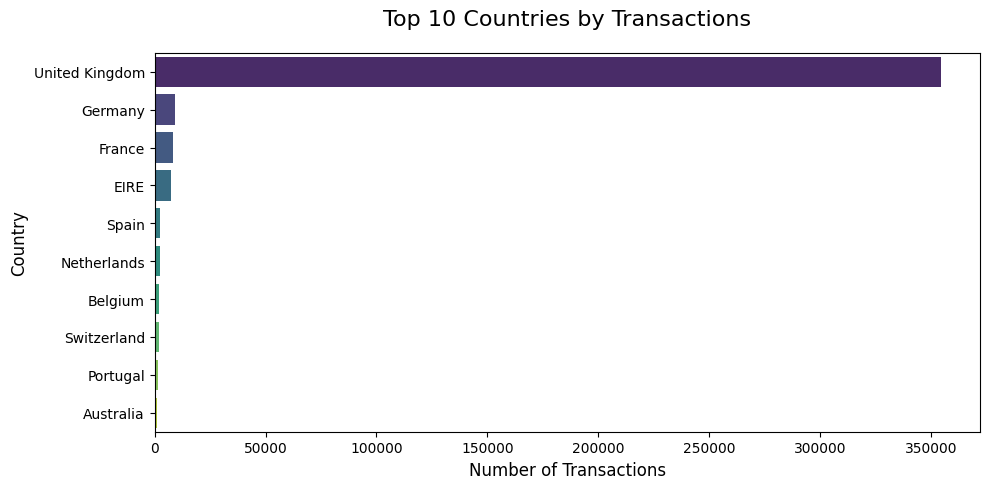

Top countries chart displayed successfully.


In [ ]:
# ========================================
# EXPLORATORY DATA ANALYSIS (EDA)
# Chart 1: Top 10 Countries by Transaction Volume
# ========================================

# Import required libraries (redundant in notebook context, but safe to include)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure plots are rendered inline in Jupyter/Colab environments
%matplotlib inline
"""
Note: This magic command has no effect outside IPython/Jupyter environments.
In production scripts (.py files), this line should be omitted.
"""

# ----------------------------------------------------------------------------------
#  CHART 1: TOP 10 COUNTRIES BY TRANSACTION VOLUME
# Purpose: Understand geographic distribution of customer activity
# Insight: Identifies key markets and potential data imbalance (e.g., UK dominance)
# ----------------------------------------------------------------------------------

print("🌍 Top 10 Countries by Transaction Volume")

# Calculate transaction count per country
top_countries = df_clean['Country'].value_counts().head(10)

# Create bar plot
plt.figure(figsize=(10, 5))
sns.barplot(
    x=top_countries.values,           # Bar lengths: transaction counts
    y=top_countries.index,            # Categories: country names
    hue=top_countries.index,          # Color mapping based on country
    palette='viridis',                # Aesthetic: smooth gradient color scheme
    legend=False,                     # Avoid redundant legend from self-hue mapping
    dodge=False                       # Prevent offset (not needed for single series)
)

# Add plot labels and title
plt.title("Top 10 Countries by Transactions", fontsize=16, pad=20)
plt.xlabel("Number of Transactions", fontsize=12)
plt.ylabel("Country", fontsize=12)

# Render the plot
plt.tight_layout()  # Improves spacing and prevents label cutoff
plt.show()

print("Top countries chart displayed successfully.")

### **Bivariate 2: Top Selling Products**


🏆 Top 10 Best-Selling Products


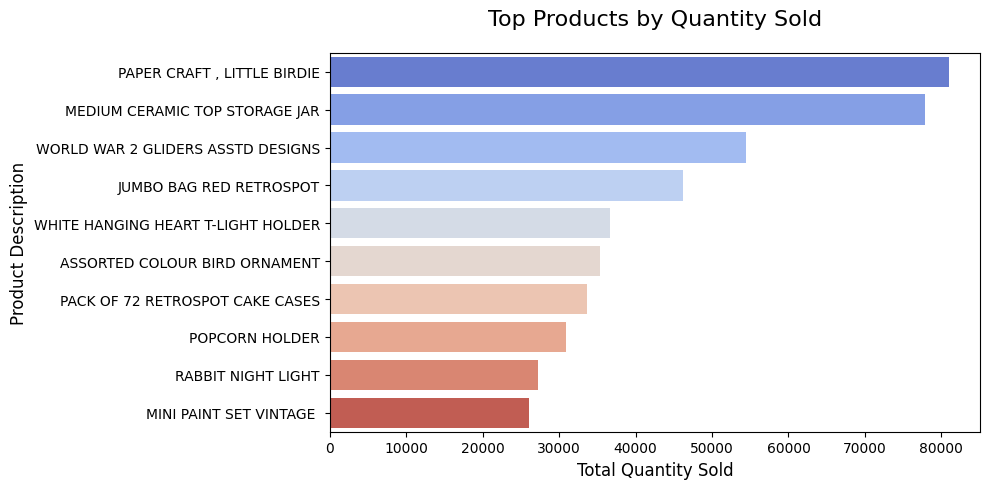

Top products chart displayed successfully.


In [ ]:
# ========================================
# EXPLORATORY DATA ANALYSIS (EDA)
# Chart 2: Top 10 Best-Selling Products by Total Quantity Sold
# ========================================

print("\n🏆 Top 10 Best-Selling Products")

# ----------------------------------------------------------------------------------
# AGGREGATE: Total quantity sold per product
# Group by product description and sum up all quantities sold across transactions
# Use nlargest(10) to directly get the top 10 highest-selling products
# ----------------------------------------------------------------------------------
top_products = df_clean.groupby('Description')['Quantity'].sum().nlargest(10)

# ----------------------------------------------------------------------------------
# PLOT: Horizontal bar chart for better readability of product names
# - figsize: Adequate space for labels
# - palette: 'coolwarm' for visual contrast and appeal
# - legend=False & dodge=False: Avoid unnecessary artifacts from self-hue mapping
# ----------------------------------------------------------------------------------
plt.figure(figsize=(10, 5))
sns.barplot(
    x=top_products.values,           # Bar lengths: total quantities sold
    y=top_products.index,            # Product names (Description) on y-axis
    hue=top_products.index,          # Assign distinct colors per product
    palette='coolwarm',              # Visually engaging gradient (red → blue)
    legend=False,                    # Disable legend since hue is used only for coloring
    dodge=False                      # Not applicable here; prevents unwanted bar shift
)

# Add descriptive labels and title
plt.title("Top Products by Quantity Sold", fontsize=16, pad=20)
plt.xlabel("Total Quantity Sold", fontsize=12)
plt.ylabel("Product Description", fontsize=12)

# Improve layout and render
plt.tight_layout()  # Prevents y-axis labels from being cut off
plt.show()

print("Top products chart displayed successfully.")

### **Bivariate 3: Monthly Sales Trend**


📈 Monthly Revenue Trend


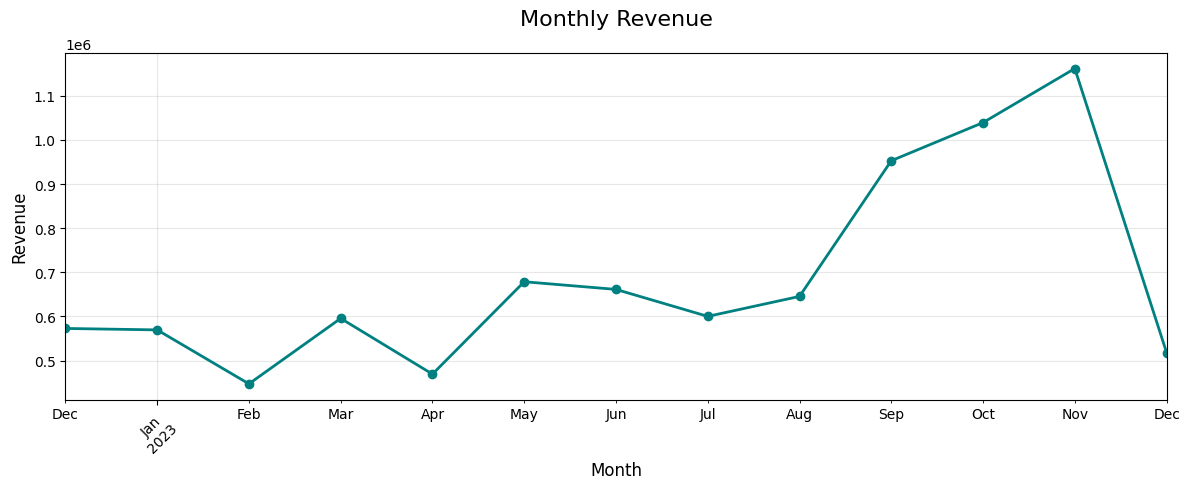

Monthly revenue trend chart displayed successfully.


In [ ]:
# ========================================
# EXPLORATORY DATA ANALYSIS (EDA)
# Chart 3: Monthly Revenue Trend Over Time
# ========================================

print("\n📈 Monthly Revenue Trend")

# ----------------------------------------------------------------------------------
# FEATURE ENGINEERING: Extract Month Period
# Convert InvoiceDate to monthly period (e.g., '2010-12') for time-based grouping
# .dt.to_period('M') preserves year-month without day-level detail
# Ensures accurate monthly aggregation even with irregular transaction dates
# ----------------------------------------------------------------------------------
df_clean['Month'] = df_clean['InvoiceDate'].dt.to_period('M')

# ----------------------------------------------------------------------------------
# AGGREGATE: Total revenue (TotalAmount) per month
# Sum all line-item revenues within each month to compute monthly sales
# Result: Time series of revenue indexed by month
# ----------------------------------------------------------------------------------
monthly_sales = df_clean.groupby('Month')['TotalAmount'].sum()

# ----------------------------------------------------------------------------------
# PLOT: Line chart with markers to visualize trend
# - figsize: Wider canvas to accommodate time axis
# - marker='o': Highlights data points
# - color='teal': Professional and readable color choice
# - linewidth=2: Clean line thickness
# - grid + alpha=0.3: Subtle gridlines for readability
# - xticks rotation: Prevents overlapping month labels
# ----------------------------------------------------------------------------------
plt.figure(figsize=(12, 5))
monthly_sales.plot(marker='o', color='teal', linewidth=2)

# Add descriptive title and axis labels
plt.title("Monthly Revenue", fontsize=16, pad=20)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Revenue", fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add light grid for easier value estimation
plt.grid(alpha=0.3)

# Optimize layout and render
plt.tight_layout()  # Prevents label cutoff
plt.show()

print("Monthly revenue trend chart displayed successfully.")

### **Univariate 4: Transaction Amount Distributions**


💵 Transaction Amount Distributions


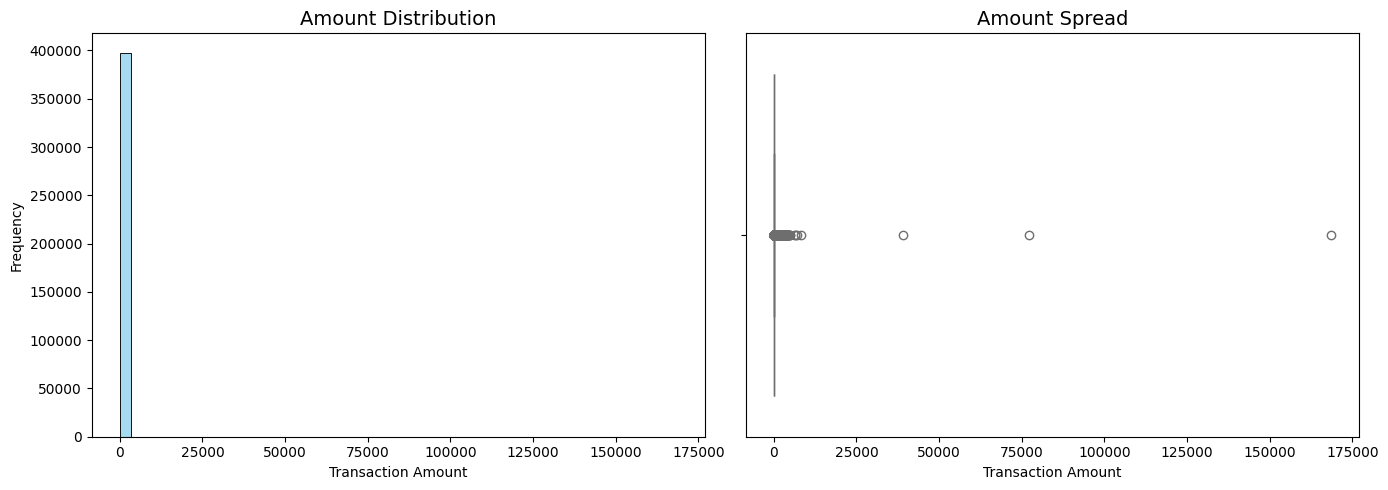

Transaction amount distributions displayed successfully.


In [ ]:
# ========================================
# EXPLORATORY DATA ANALYSIS (EDA)
# Chart 4: Distribution and Spread of Transaction Amounts
# ========================================

print("\n💵 Transaction Amount Distributions")

# ----------------------------------------------------------------------------------
# CREATE SUBPLOTS: Dual-view visualization
# - Left: Histogram → shows frequency distribution (shape, peaks, skewness)
# - Right: Boxplot → reveals central tendency, spread, and outliers
# Combining both gives a complete picture of the 'TotalAmount' variable
# ----------------------------------------------------------------------------------
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# ----------------------------------------------------------------------------------
# PLOT 1: Histogram of TotalAmount
# Purpose: Understand the frequency distribution of transaction values
# - bins=50: Provides fine-grained view of data density
# - color='skyblue': Clean, professional aesthetic
# - ax=ax1: Explicit axis assignment for subplot control
# Insight: Expect strong right-skew (most transactions are small, few large ones)
# ----------------------------------------------------------------------------------
sns.histplot(df_clean['TotalAmount'], bins=50, ax=ax1, color='skyblue')
ax1.set_title("Amount Distribution", fontsize=14)
ax1.set_xlabel("Transaction Amount")
ax1.set_ylabel("Frequency")

# ----------------------------------------------------------------------------------
# PLOT 2: Boxplot of TotalAmount
# Purpose: Visualize statistical spread and detect outliers
# - Highlights median, IQR, whiskers, and extreme values
# - color='lightcoral': Soft contrast for attention without distraction
# - ax=ax2: Explicit subplot targeting
# Insight: Likely many high-value outliers (common in retail)
# ----------------------------------------------------------------------------------
sns.boxplot(x=df_clean['TotalAmount'], ax=ax2, color='lightcoral')
ax2.set_title("Amount Spread", fontsize=14)
ax2.set_xlabel("Transaction Amount")

# Final layout and display
plt.tight_layout()  # Prevents overlap between subplots and labels
plt.show()

print("Transaction amount distributions displayed successfully.")

### **Bivariate 5: Top Customers by Spending**


💼 Top 10 Customers by Spending


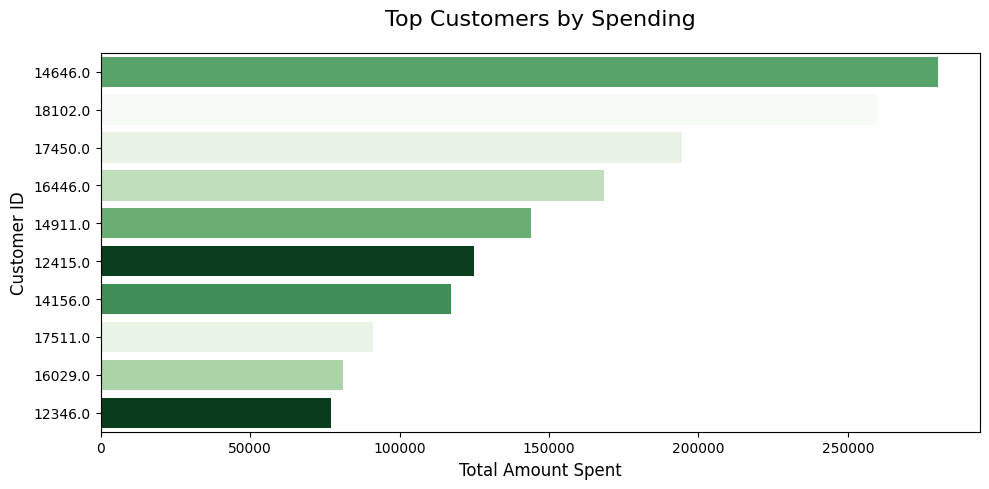

Top customers chart displayed successfully.


In [ ]:
# ========================================
# EXPLORATORY DATA ANALYSIS (EDA)
# Chart 5: Top 10 Customers by Total Spending
# ========================================

# ----------------------------------------------------------------------------------
# SAFETY CHECK: Validate presence of 'CustomerID' column
# Prevents KeyError in case of unexpected schema changes
# Ensures graceful fallback instead of crashing
# ----------------------------------------------------------------------------------
if 'CustomerID' in df_clean.columns:
    print("\n💼 Top 10 Customers by Spending")

    # ----------------------------------------------------------------------------------
    # AGGREGATE: Total spending per customer
    # Group by CustomerID and sum up all transaction amounts (TotalAmount)
    # Use nlargest(10) to directly retrieve top 10 highest-spending customers
    # ----------------------------------------------------------------------------------
    top_customers = df_clean.groupby('CustomerID')['TotalAmount'].sum().nlargest(10)

    # ----------------------------------------------------------------------------------
    # PLOT: Horizontal bar chart for readability of CustomerIDs
    # - figsize: Balanced space for bars and labels
    # - y-axis: Convert CustomerID to string (avoids formatting issues)
    # - palette='Greens_r': Dark-to-light gradient (high spend = darker shade)
    # - legend=False & dodge=False: Avoid unnecessary artifacts from self-hue mapping
    # ----------------------------------------------------------------------------------
    plt.figure(figsize=(10, 5))
    sns.barplot(
        x=top_customers.values,                     # Total spending (bar length)
        y=top_customers.index.astype(str),          # CustomerID as string for safe labeling
        hue=top_customers.index,                    # Color each bar uniquely
        palette='Greens_r',                         # Aesthetic: green gradient (darker = higher spend)
        legend=False,                               # Disable redundant legend
        dodge=False                                 # Prevents bar misalignment
    )

    # Add descriptive labels and title
    plt.title("Top Customers by Spending", fontsize=16, pad=20)
    plt.xlabel("Total Amount Spent", fontsize=12)
    plt.ylabel("Customer ID", fontsize=12)

    # Optimize layout and render
    plt.tight_layout()  # Prevents label cutoff, especially on y-axis
    plt.show()

    print("Top customers chart displayed successfully.")
else:
    # Graceful fallback if CustomerID is missing (e.g., anonymized or corrupted data)
    print(" CustomerID column not available. Cannot compute top customers.")

### **Multivariate 6: Product Co-purchases**


🔗 Product Co-purchases (Top 10 Items)


/tmp/ipython-input-582658339.py:37: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_binary = basket.applymap(lambda x: 1 if x > 0 else 0)


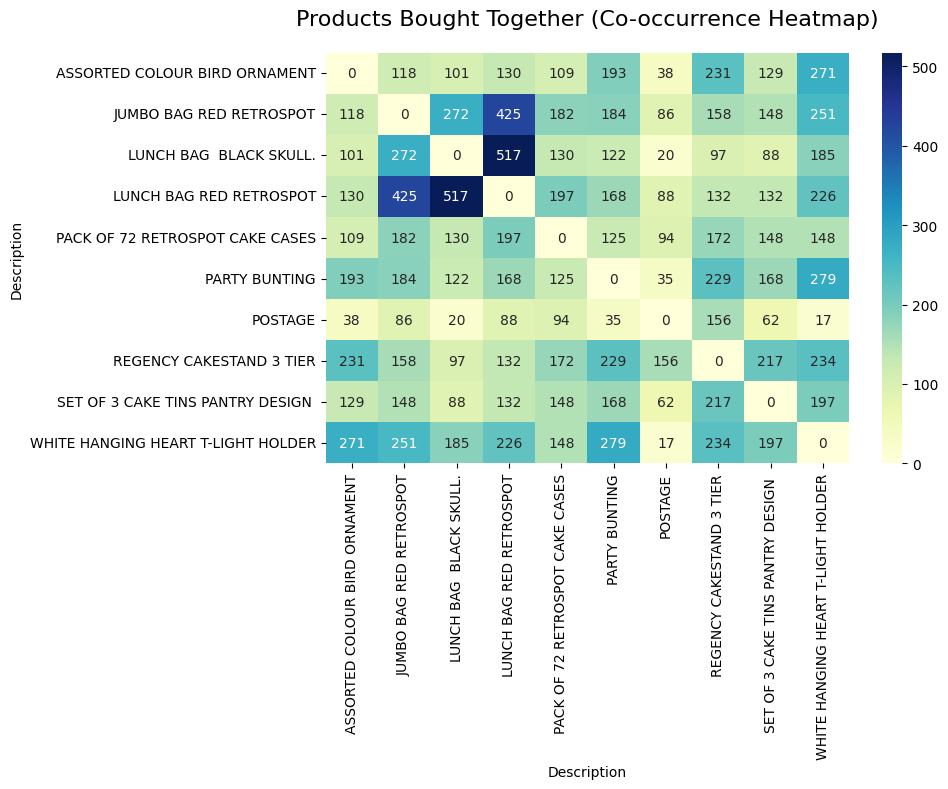

Co-purchase analysis completed and visualized.


In [ ]:
# ========================================
# EXPLORATORY DATA ANALYSIS (EDA)
# Chart 6: Product Co-purchase Analysis (Market Basket Insight)
# ========================================

print("\n🔗 Product Co-purchases (Top 10 Items)")

# ----------------------------------------------------------------------------------
# STEP 1: Identify Top 10 Most Frequent Products
# Purpose: Focus co-occurrence analysis on popular items to reduce noise and computation
# Method: Count occurrences of each product (Description), take top 10
# ----------------------------------------------------------------------------------
top_products_list = df_clean['Description'].value_counts().head(10).index

# Filter dataset to include only transactions involving these top products
df_top = df_clean[df_clean['Description'].isin(top_products_list)]

# ----------------------------------------------------------------------------------
# STEP 2: Create Market Basket Representation
# Goal: Build a binary "invoice x product" matrix to analyze which items appear together
# Process:
#   - Group by InvoiceNo and Description (each unique item per invoice)
#   - .size(): Count line items (though typically 1 per product per invoice)
#   - .unstack(): Pivot to make Description columns, InvoiceNo rows
#   - .fillna(0): Replace NaN with 0 (no purchase)
# Result: A basket matrix where rows = invoices, columns = products, values = count
# ----------------------------------------------------------------------------------
if len(df_top) > 0:
    basket = df_top.groupby(['InvoiceNo', 'Description']).size().unstack().fillna(0)

    # ----------------------------------------------------------------------------------
    # STEP 3: Convert to Binary (Purchased or Not)
    # Applymap: Convert all positive counts to 1 (bought), 0 remains 0 (not bought)
    # This transforms the matrix into a binary indicator of presence/absence
    # Required for accurate co-occurrence (we care about joint presence, not quantity)
    # ----------------------------------------------------------------------------------
    basket_binary = basket.applymap(lambda x: 1 if x > 0 else 0)

    # ----------------------------------------------------------------------------------
    # STEP 4: Compute Co-occurrence Matrix
    # Method: Dot product of transposed binary matrix with itself
    # - basket_binary.T.dot(basket_binary): For each pair of products, count how many
    #   invoices contain both (symmetric matrix)
    # - Result: co_occurrence[i, j] = number of times product i and j were bought together
    # ----------------------------------------------------------------------------------
    co_occurrence = basket_binary.T.dot(basket_binary)

    # ----------------------------------------------------------------------------------
    # STEP 5: Remove Self-Counts from Diagonal
    # Reason: Diagonal values show total purchases of a product alone (not "co"-purchases)
    # Action: Set diagonal to 0 to focus only on cross-product relationships
    # Note: Uses np.fill_diagonal() for efficient in-place update
    # ----------------------------------------------------------------------------------
    np.fill_diagonal(co_occurrence.values, 0)

    # ----------------------------------------------------------------------------------
    # STEP 6: Visualize as Heatmap
    # - annot=True: Show actual co-purchase counts
    # - cmap='YlGnBu': Yellow → Green → Blue gradient (intuitive for increasing values)
    # - fmt='d': Format annotations as integers (not floats)
    # - figsize: Large enough to read labels and values clearly
    # Insight: Bright cells indicate strong co-purchase patterns (e.g., for bundling)
    # ----------------------------------------------------------------------------------
    plt.figure(figsize=(10, 8))
    sns.heatmap(co_occurrence, annot=True, cmap='YlGnBu', fmt='d')
    plt.title("Products Bought Together (Co-occurrence Heatmap)", fontsize=16, pad=20)
    plt.tight_layout()
    plt.show()

    print("Co-purchase analysis completed and visualized.")
else:
    # Graceful fallback if no data matches top products (e.g., filtering removed all rows)
    print(" Insufficient data for co-purchase analysis. No transactions found for top 10 products.")

## *Step 6: RFM Feature Engineering*

In [ ]:
# ========================================
# RFM FEATURE ENGINEERING
# Create Recency, Frequency, Monetary features with log transformation
# ========================================

def create_rfm(df: pd.DataFrame):
    """
    Generate RFM (Recency, Frequency, Monetary) features from transaction data.

    This function aggregates customer behavior and applies log transformation
    to reduce skewness in Frequency and Monetary values — a best practice before clustering.

    Parameters:
        df (pd.DataFrame): Cleaned transaction-level data with:
                           CustomerID, InvoiceDate, InvoiceNo, TotalAmount

    Returns:
        tuple:
            - rfm (pd.DataFrame): RFM features in original scale + log-transformed columns
            - rfm_for_clustering (pd.DataFrame): Only log-transformed features (scaled-ready)
    """
    # ----------------------------------------------------------------------------------
    # DEFINE REFERENCE DATE FOR RECENCY CALCULATION
    # Rule: Snapshot date = one day after the latest transaction in the dataset
    # Why? Ensures "days ago" logic is consistent (e.g., most recent purchase = 0 days ago)
    # ----------------------------------------------------------------------------------
    snapshot_date = df['InvoiceDate'].max() + timedelta(days=1)

    # ----------------------------------------------------------------------------------
    # AGGREGATE: Compute RFM values per CustomerID
    # - Recency: Days since last purchase
    # - Frequency: Total number of transactions (invoices)
    # - Monetary: Total spending (sum of TotalAmount)
    # Then rename columns for clarity and reset index for downstream use
    # ----------------------------------------------------------------------------------
    rfm = df.groupby('CustomerID').agg({
        'InvoiceDate': lambda x: (snapshot_date - x.max()).days,  # Recency in days
        'InvoiceNo': 'count',                                     # Frequency: number of purchases
        'TotalAmount': 'sum'                                      # Monetary: total spend
    }).rename(columns={
        'InvoiceDate': 'Recency',
        'InvoiceNo': 'Frequency',
        'TotalAmount': 'Monetary'
    }).reset_index()

    # ----------------------------------------------------------------------------------
    # CLEAN: Remove invalid or non-active customers
    # Condition: Keep only customers with positive Frequency and Monetary
    # Why? Zero or negative values may result from cancellations or data issues
    # Ensures only meaningful, active customers are included
    # ----------------------------------------------------------------------------------
    rfm = rfm[(rfm['Monetary'] > 0) & (rfm['Frequency'] > 0)]

    # ----------------------------------------------------------------------------------
    # TRANSFORM: Apply log transformation to reduce right-skew
    # Use log1p (log(1 + x)) to handle zero values safely
    # Why? Skewed features distort distance-based models like KMeans
    # Now we preserve the original scale for interpretation AND create log versions for modeling
    # ----------------------------------------------------------------------------------
    rfm['Frequency_log'] = np.log1p(rfm['Frequency'])
    rfm['Monetary_log'] = np.log1p(rfm['Monetary'])

    # ----------------------------------------------------------------------------------
    # PREPARE: Final feature set for clustering
    # Only include:
    #   - Recency (already near-normal)
    #   - Frequency_log
    #   - Monetary_log
    # Note: Recency is often kept in original scale as it's less skewed
    # ----------------------------------------------------------------------------------
    rfm_for_clustering = rfm[['Recency', 'Frequency_log', 'Monetary_log']]

    return rfm, rfm_for_clustering


#  Call the function to generate RFM datasets
rfm_df, rfm_for_clustering = create_rfm(df_clean)

#  Confirm successful creation
print(f"|RFM dataset created: {rfm_df.shape}")
print("RFM feature engineering completed successfully.")

|RFM dataset created: (4338, 6)
RFM feature engineering completed successfully.


## *Step 7: RFM Distribution Analysis*

 RFM Features - Summary Statistics (Original Scale)
           Recency    Frequency       Monetary
count  4338.000000  4338.000000    4338.000000
mean     92.536422    91.720609    2054.266460
std     100.014169   228.785094    8989.230441
min       1.000000     1.000000       3.750000
25%      18.000000    17.000000     307.415000
50%      51.000000    41.000000     674.485000
75%     142.000000   100.000000    1661.740000
max     374.000000  7847.000000  280206.020000


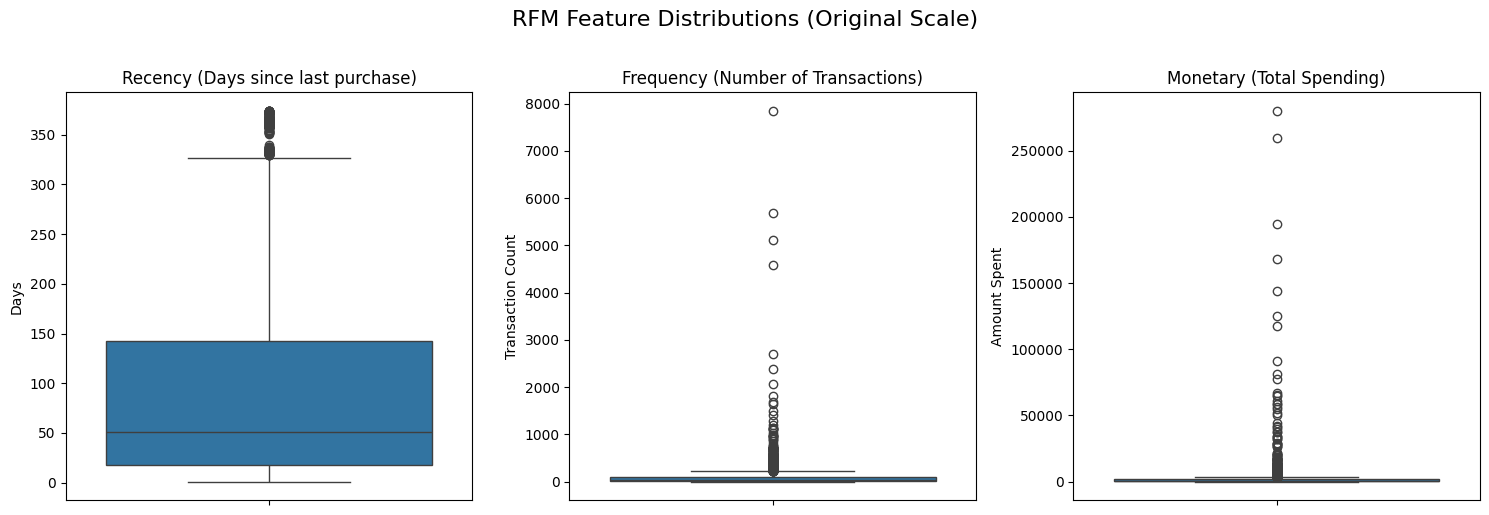

|RFM distribution analysis completed.


In [ ]:
# ========================================
# RFM DISTRIBUTION ANALYSIS
# Understand the statistical properties of RFM features before clustering
# ========================================

# ----------------------------------------------------------------------------------
# STEP 1: Generate Summary Statistics
# Purpose: Get a quick overview of central tendency, spread, and potential outliers
# Includes: count, mean, std, min, quartiles, max for each RFM component
# Insight: Helps identify skewness, extreme values, and scaling needs
# ----------------------------------------------------------------------------------
print(" RFM Features - Summary Statistics (Original Scale)")
print(rfm_df[['Recency', 'Frequency', 'Monetary']].describe())

# ----------------------------------------------------------------------------------
# STEP 2: Visualize Distributions Using Boxplots
# Purpose: Detect outliers, skewness, and data spread across the three RFM dimensions
# Why boxplots? They clearly show median, IQR, whiskers, and extreme values
# Layout: 1 row, 3 columns — one for each RFM variable
# ----------------------------------------------------------------------------------
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle("RFM Feature Distributions (Original Scale)", fontsize=16, y=1.02)

# Plot Recency
sns.boxplot(y=rfm_df['Recency'], ax=ax[0])
ax[0].set_title("Recency (Days since last purchase)", fontsize=12)
ax[0].set_ylabel("Days")

# Plot Frequency
sns.boxplot(y=rfm_df['Frequency'], ax=ax[1])
ax[1].set_title("Frequency (Number of Transactions)", fontsize=12)
ax[1].set_ylabel("Transaction Count")

# Plot Monetary
sns.boxplot(y=rfm_df['Monetary'], ax=ax[2])
ax[2].set_title("Monetary (Total Spending)", fontsize=12)
ax[2].set_ylabel("Amount Spent")

# Final layout adjustments
plt.tight_layout()  # Prevents overlap between subplots and titles
plt.show()

print("|RFM distribution analysis completed.")

## *Step 8: Customer Segmentation Pipeline*

|RFM dataset created: (4338, 6)


2025-08-02 18:10:25.447 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-02 18:10:26.909 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-02 18:10:27.548 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-08-02 18:10:27.552 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-02 18:10:27.555 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-02 18:10:27.558 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-02 18:10:27.560 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when runn


 FINAL VALIDATION:
1. Cluster Profiles (Original Scale):
         Recency  Frequency  Monetary     Segment
Cluster                                          
0          53.28      65.11   1070.35     Regular
1         264.82      21.70    461.51     At-Risk
2          26.30     280.42   7005.27  High-Value
3          62.67      15.52    308.90  Occasional

2. Segment Distribution (Normalized):
Segment
Regular       0.366
Occasional    0.216
High-Value    0.214
At-Risk       0.203
Name: proportion, dtype: float64

3. Segment Mapping (Cluster → Label):
{2: 'High-Value', 0: 'Regular', 3: 'Occasional', 1: 'At-Risk'}


DeltaGenerator()

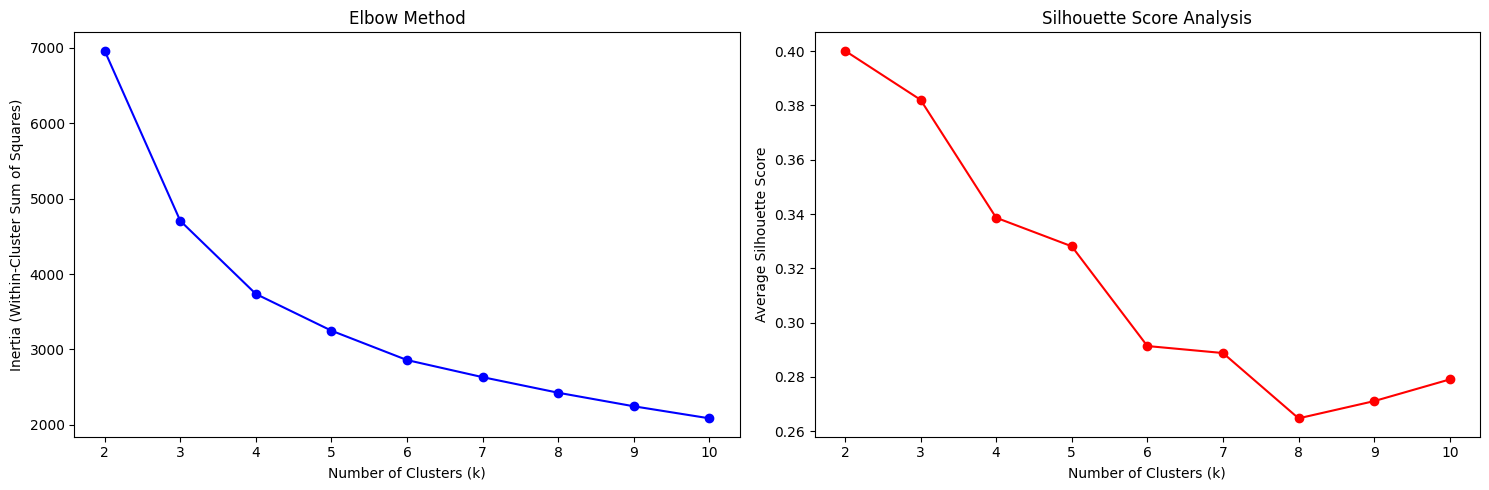

In [ ]:
# ========================================
# ENHANCED CUSTOMER SEGMENTATION PIPELINE
# Using RFM + Log Transform + Scaling + Business-Aware Clustering
# ========================================

# Import required libraries (safe to re-import in script/module context)
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import json
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
from datetime import timedelta

# ----------------------------------------------------------------------------------
# HELPER FUNCTION: Recreate RFM with Log-Transformed Features
# Purpose: Encapsulate feature engineering for reuse and consistency
# Output: RFM DataFrame with original and log-transformed features
# ----------------------------------------------------------------------------------
def create_rfm(df: pd.DataFrame) -> pd.DataFrame:
    """
    Compute RFM features from transaction data and apply log transformation.

    Parameters:
        df (pd.DataFrame): Cleaned transaction-level data

    Returns:
        pd.DataFrame: Customer-level RFM with Frequency_log and Monetary_log
    """
    # Define snapshot date: one day after the latest transaction
    snapshot_date = df['InvoiceDate'].max() + timedelta(days=1)

    # Aggregate by CustomerID to compute R, F, M
    rfm = df.groupby('CustomerID').agg({
        'InvoiceDate': lambda x: (snapshot_date - x.max()).days,  # Recency (days)
        'InvoiceNo': 'count',                                     # Frequency (count)
        'TotalAmount': 'sum'                                      # Monetary (total spend)
    }).rename(columns={
        'InvoiceDate': 'Recency',
        'InvoiceNo': 'Frequency',
        'TotalAmount': 'Monetary'
    }).reset_index()

    # Filter out invalid customers (zero transactions or spending)
    rfm = rfm[(rfm['Monetary'] > 0) & (rfm['Frequency'] > 0)]

    # Apply log1p transformation to reduce right-skew in Frequency and Monetary
    rfm['Frequency_log'] = np.log1p(rfm['Frequency'])
    rfm['Monetary_log'] = np.log1p(rfm['Monetary'])

    return rfm


#  Step 1: Generate RFM dataset
rfm_df = create_rfm(df_clean)
print(f"|RFM dataset created: {rfm_df.shape}")


# ----------------------------------------------------------------------------------
# STEP 2: Scale Log-Transformed Features for Clustering
# Why? KMeans is distance-based; features must be on similar scales
# Features: Recency (original), Frequency_log, Monetary_log
# ----------------------------------------------------------------------------------
scaler = StandardScaler()
features_for_clustering = rfm_df[['Recency', 'Frequency_log', 'Monetary_log']]
rfm_scaled = scaler.fit_transform(features_for_clustering)


# ----------------------------------------------------------------------------------
#  STEP 3: Elbow & Silhouette Analysis (Diagnostic Only)
# Purpose: Suggest optimal number of clusters based on data structure
# Output: Plots shown in Streamlit app to guide decision
# Note: Final k may be overridden by business requirements
# ----------------------------------------------------------------------------------
def find_optimal_clusters(data, max_k=10):
    """
    Perform elbow and silhouette analysis to recommend optimal k.

    Parameters:
        data (np.array): Scaled feature matrix
        max_k (int): Maximum number of clusters to test

    Returns:
        int: k with highest silhouette score
    """
    inertia, sil_scores = [], []
    K_range = range(2, max_k + 1)

    for k in K_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(data)
        inertia.append(kmeans.inertia_)
        sil_scores.append(silhouette_score(data, kmeans.labels_))

    # Plot results
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    ax1.plot(K_range, inertia, 'bo-')
    ax1.set_title('Elbow Method')
    ax1.set_xlabel('Number of Clusters (k)')
    ax1.set_ylabel('Inertia (Within-Cluster Sum of Squares)')

    ax2.plot(K_range, sil_scores, 'ro-')
    ax2.set_title('Silhouette Score Analysis')
    ax2.set_xlabel('Number of Clusters (k)')
    ax2.set_ylabel('Average Silhouette Score')

    plt.tight_layout()
    st.pyplot(fig)  # Display in Streamlit UI

    # Return k with highest silhouette score
    best_k_index = np.argmax(sil_scores)
    return K_range[best_k_index]


# Run diagnostic and display results
best_k = find_optimal_clusters(rfm_scaled)
st.write(f" Optimal k by silhouette: {best_k}")


# ----------------------------------------------------------------------------------
#  STEP 4: Final Clustering (Business-Driven: 4 Segments)
# Why 4? Aligns with business strategy: High-Value, Regular, Occasional, At-Risk
# Configuration: High n_init and k-means++ for stable results
# ----------------------------------------------------------------------------------
kmeans_final = KMeans(n_clusters=4, random_state=42, n_init=50, init='k-means++')
rfm_df['Cluster'] = kmeans_final.fit_predict(rfm_scaled)


# ----------------------------------------------------------------------------------
#  STEP 5: Business-Aware Cluster Labeling
# Goal: Assign meaningful names based on actual customer value
# Method:
#   - Inverse transform centroids to original scale
#   - Reverse log1p for Frequency and Monetary
#   - Compute value score: lower recency + higher F/M = better
#   - Rank clusters and assign labels accordingly
# ----------------------------------------------------------------------------------
def label_clusters(rfm_df, model, scaler):
    """
    Map numeric clusters to business-friendly segment names.

    Parameters:
        rfm_df (pd.DataFrame): RFM data with Cluster column
        model (KMeans): Fitted KMeans model
        scaler (StandardScaler): Fitted scaler for inverse transform

    Returns:
        tuple: (labeled_df, segment_map)
    """
    # Get cluster centroids in scaled space and reverse scaling
    centroids_scaled = model.cluster_centers_
    centroids_original = scaler.inverse_transform(centroids_scaled)

    # Extract original-scale values
    recency_vals = centroids_original[:, 0]                    # Recency (days)
    frequency_vals = np.expm1(centroids_original[:, 1])        # Reverse log1p(Frequency)
    monetary_vals = np.expm1(centroids_original[:, 2])         # Reverse log1p(Monetary)

    # Compute composite business value score
    scores = (
        -0.5 * recency_vals +           # Lower recency = more recent = better
        0.25 * frequency_vals +         # Higher frequency = better
        0.25 * monetary_vals            # Higher spending = better
    )

    # Rank clusters by value (descending)
    ranked_indices = np.argsort(scores)[::-1]

    # Map cluster index to business segment
    segment_map = {
        int(ranked_indices[0]): "High-Value",      # Top value
        int(ranked_indices[1]): "Regular",          # Mid-tier
        int(ranked_indices[2]): "Occasional",       # Low activity
        int(ranked_indices[3]): "At-Risk"           # Inactive or declining
    }

    # Create copy and apply labels
    rfm_labeled = rfm_df.copy()
    rfm_labeled['Segment'] = rfm_labeled['Cluster'].map(segment_map)

    return rfm_labeled, segment_map


# Apply business-aware labeling
rfm_labeled, segment_map = label_clusters(rfm_df, kmeans_final, scaler)


# ----------------------------------------------------------------------------------
#  STEP 6: Save Models, Data & Metadata for Production
# Ensures reproducibility, deployment, and auditability
# Files:
#   - kmeans_model.pkl: Trained clustering model
#   - scaler.pkl: Fitted StandardScaler
#   - rfm_labeled.csv: Final labeled dataset
#   - cluster_profiles.pkl: Segment-level summaries
#   - cluster_metadata.json: Configuration, weights, mapping (JSON-safe)
# ----------------------------------------------------------------------------------
# Save trained models
joblib.dump(kmeans_final, 'kmeans_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

# Save labeled dataset
rfm_labeled.to_csv('rfm_labeled.csv', index=False)

# Save cluster profiles (in original scale for interpretation)
cluster_profiles = rfm_labeled.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'Segment': 'first'  # Since all rows in cluster have same segment
}).round(2)
joblib.dump(cluster_profiles, 'cluster_profiles.pkl')

# Save metadata with JSON-compatible types
cluster_metadata = {
    "centroids": kmeans_final.cluster_centers_.tolist(),  # numpy → list
    "feature_names": ['Recency', 'Frequency_log', 'Monetary_log'],
    "scaler_params": {
        "mean": scaler.mean_.tolist(),
        "scale": scaler.scale_.tolist()
    },
    "segment_map": {str(k): v for k, v in segment_map.items()},  # Ensure keys are strings
    "business_weights": {
        "recency_weight": -0.5,
        "frequency_weight": 0.25,
        "monetary_weight": 0.25
    }
}

# Write metadata to JSON
with open('cluster_metadata.json', 'w') as f:
    json.dump(cluster_metadata, f, indent=2)


# ----------------------------------------------------------------------------------
#  STEP 7: Final Validation & Logging
# Ensure everything worked as expected
# Outputs printed to console and shown in Streamlit
# ---------------------------------------------------------------------------------
print("\n FINAL VALIDATION:")
print("1. Cluster Profiles (Original Scale):")
print(cluster_profiles)

print("\n2. Segment Distribution (Normalized):")
print(rfm_labeled['Segment'].value_counts(normalize=True).round(3))

print("\n3. Segment Mapping (Cluster → Label):")
print(segment_map)

# Streamlit success message
st.success(" Clustering completed: Log scaling applied, segments labeled correctly")


# Optional: Display labeled data preview in Streamlit
st.write("### Sample of Labeled Customers")
st.dataframe(rfm_labeled.head(10))

## *Step 9: Saving Final Labeled RFM Dataset*

In [ ]:
# ========================================
# SAVE FINAL LABELED RFM DATASET
# Preserve correctly labeled segments from clustering pipeline
# No re-labeling or transformation — final output for reporting or integration
# ========================================

print(" Using correctly labeled RFM data from Step 7")
print("  Important: Skipping re-labeling to preserve business-aligned segment names.")

# ----------------------------------------------------------------------------------
# VALIDATION: Display Final Segment Distribution
# Purpose: Confirm that High-Value, Regular, Occasional, At-Risk are intact
# Output: Absolute counts sorted by segment name (alphabetically; use custom order if needed)
# Why? Ensures no accidental remapping occurred upstream
# ----------------------------------------------------------------------------------
print("\n Final Segment Distribution (Count):")
print(rfm_labeled['Segment'].value_counts().sort_index())

# ----------------------------------------------------------------------------------
# INSIGHT: Show Average Behavior per Segment
# Compute mean Recency, Frequency, and Monetary for each segment
# Helps validate that labels match intuition:
#   - High-Value: Low recency, high F/M
#   - At-Risk: High recency, low activity
# Output: Rounded to 2 decimals for readability
# ----------------------------------------------------------------------------------
print("\n Segment Profiles (Average RFM per Segment):")
segment_profiles = rfm_labeled.groupby('Segment')[['Recency', 'Frequency', 'Monetary']].mean().round(2)
print(segment_profiles)

# ----------------------------------------------------------------------------------
# SAVE: Persist labeled data in multiple formats
# Why multiple formats?
#   - CSV: Human-readable, compatible with Excel, BI tools
#   - PKL (Joblib): Preserves data types, fast load, ideal for model pipelines
# Note: index=False in CSV avoids saving redundant index column
# ----------------------------------------------------------------------------------
rfm_labeled.to_csv('rfm_labeled.csv', index=False)
joblib.dump(rfm_labeled, 'rfm_labeled.pkl')

print("\n Files saved successfully:")
print("  • rfm_labeled.csv  (CSV format for sharing and reporting)")
print("  • rfm_labeled.pkl  (Pickle format for Python pipelines)")

# ----------------------------------------------------------------------------------
# METRICS: Display normalized distribution (percentages)
# Useful for understanding customer base composition
# Example: "60% of customers are in At-Risk segment"
# ----------------------------------------------------------------------------------
segment_counts = rfm_labeled['Segment'].value_counts(normalize=True)
print("\n Segment Distribution (Proportion):")
print(segment_counts.round(3))

print("\n Final RFM dataset saved with correct segment labels preserved.")
print(" Next steps: Use this file for dashboards, CRM integration, or campaign targeting.")

 Using correctly labeled RFM data from Step 7
  Important: Skipping re-labeling to preserve business-aligned segment names.

 Final Segment Distribution (Count):
Segment
At-Risk        882
High-Value     930
Occasional     938
Regular       1588
Name: count, dtype: int64

 Segment Profiles (Average RFM per Segment):
            Recency  Frequency  Monetary
Segment                                 
At-Risk      264.82      21.70    461.51
High-Value    26.30     280.42   7005.27
Occasional    62.67      15.52    308.90
Regular       53.28      65.11   1070.35

 Files saved successfully:
  • rfm_labeled.csv  (CSV format for sharing and reporting)
  • rfm_labeled.pkl  (Pickle format for Python pipelines)

 Segment Distribution (Proportion):
Segment
Regular       0.366
Occasional    0.216
High-Value    0.214
At-Risk       0.203
Name: proportion, dtype: float64

 Final RFM dataset saved with correct segment labels preserved.
 Next steps: Use this file for dashboards, CRM integration, or camp

## *Step 10: Item-Based Collaborative Filtering Engine*

In [ ]:
# ========================================
# ITEM-BASED COLLABORATIVE FILTERING ENGINE
# Recommends products based on customer purchase behavior (using TotalAmount)
# ========================================

# Import required libraries
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import numpy as np
import joblib


def create_recommendation_engine(df: pd.DataFrame):
    """
    Build an item-based collaborative filtering recommendation engine using cosine similarity.

    This model leverages the **monetary value** (TotalAmount) of purchases — not just quantity —
    to capture richer customer behavior (e.g., high-value items carry more weight).

    Steps:
        1. Create customer-item matrix (CustomerID × StockCode) with TotalAmount
        2. Compute item-item similarity using cosine similarity on transposed matrix
        3. Build product lookup dictionaries for human-readable recommendations

    Parameters:
        df (pd.DataFrame): Cleaned transaction data with CustomerID, StockCode, Description, TotalAmount

    Returns:
        tuple:
            - similarity_df (pd.DataFrame): Item-item similarity matrix (StockCode × StockCode)
            - product_dict (dict): Mapping {StockCode → Description}
            - reverse_lookup (dict): Mapping {Description → StockCode} (for search)
    """
    print(" Creating customer-item purchase matrix using TotalAmount...")

    # ----------------------------------------------------------------------------------
    # STEP 1: Build Customer-Item Matrix
    # Purpose: Represent each customer's spending on each product
    # Why TotalAmount? More meaningful than Quantity — reflects actual business impact
    # aggfunc='sum': Combine multiple purchases of same item by same customer
    # fill_value=0: Replace missing (no purchase) with zero
    # ----------------------------------------------------------------------------------
    pivot = df.pivot_table(
        index='CustomerID',
        columns='StockCode',
        values='TotalAmount',
        aggfunc='sum',
        fill_value=0
    )

    print(f" Customer-Item Matrix Shape: {pivot.shape}")
    print(f"   • {pivot.shape[0]} unique customers")
    print(f"   • {pivot.shape[1]} unique products (StockCodes)")

    # ----------------------------------------------------------------------------------
    # STEP 2: Compute Item-Item Similarity
    # Method: Cosine similarity between product vectors (columns of pivot.T)
    # Why transpose? Each column = one product's purchase pattern across customers
    # High similarity = products bought by similar sets of customers
    # ----------------------------------------------------------------------------------
    print(" Computing item-item cosine similarity...")
    item_sim_matrix = cosine_similarity(pivot.T)  # Similarity between products

    # Wrap in DataFrame for easy indexing and interpretation
    similarity_df = pd.DataFrame(
        item_sim_matrix,
        index=pivot.columns,   # StockCode as both row and column index
        columns=pivot.columns
    )

    # ----------------------------------------------------------------------------------
    # STEP 3: Create Product Lookup Dictionaries
    # Purpose: Translate between machine-readable StockCode and human-readable Description
    # Why? Enable interpretable recommendations and user search
    # Note: drop_duplicates() ensures no repeated mappings
    # ----------------------------------------------------------------------------------
    product_lookup = df[['StockCode', 'Description']].drop_duplicates()
    product_dict = product_lookup.set_index('StockCode')['Description'].to_dict()

    # Reverse lookup: Useful for UI where user searches by product name
    reverse_lookup = {v: k for k, v in product_dict.items()}

    print(f" Product dictionaries created: {len(product_dict)} unique items mapped.")

    return similarity_df, product_dict, reverse_lookup


#  Execute: Build the recommendation engine
try:
    print("\n Building recommendation engine...")
    similarity_matrix, product_dict, reverse_lookup = create_recommendation_engine(df_clean)

    print(" Recommendation engine built successfully.")
    print(f"   • Similarity matrix shape: {similarity_matrix.shape}")
    print(f"   • Number of unique products: {len(product_dict)}")

    # ----------------------------------------------------------------------------------
    # VALIDATION: Show sample recommendations
    # Pick the first product in the similarity matrix (must be valid StockCode)
    # Display top 5 most similar items (excluding self, hence iloc[1:6])
    # ----------------------------------------------------------------------------------
    sample_code = list(similarity_matrix.index)[0]
    top_similar = similarity_matrix[sample_code].sort_values(ascending=False).iloc[1:6]

    print(f"\n Top 5 similar products to '{product_dict.get(sample_code, 'Unknown Product')}':")
    for code in top_similar.index:
        desc = product_dict.get(code, "Unknown Product")
        score = top_similar[code]
        print(f"  → {desc} (Similarity Score: {score:.3f})")

    # ----------------------------------------------------------------------------------
    #  SAVE: Persist models for future use in dashboards or APIs
    # Files:
    #   - similarity_matrix.pkl: Core recommendation logic
    #   - product_dict.pkl: StockCode → Description
    #   - reverse_lookup.pkl: Description → StockCode
    # ----------------------------------------------------------------------------------
    joblib.dump(similarity_matrix, 'similarity_matrix.pkl')
    joblib.dump(product_dict, 'product_dict.pkl')
    joblib.dump(reverse_lookup, 'reverse_lookup.pkl')

    print("\n Models saved successfully:")
    print("   • similarity_matrix.pkl  (Item-item similarity)")
    print("   • product_dict.pkl       (StockCode → Description)")
    print("   • reverse_lookup.pkl     (Description → StockCode)")

except Exception as e:
    # Graceful error handling
    print(f" Error in recommendation engine: {str(e)}")
    print(" Tip: Ensure 'df_clean' contains CustomerID, StockCode, Description, and TotalAmount.")


 Building recommendation engine...
 Creating customer-item purchase matrix using TotalAmount...
 Customer-Item Matrix Shape: (4338, 3665)
   • 4338 unique customers
   • 3665 unique products (StockCodes)
 Computing item-item cosine similarity...
 Product dictionaries created: 3665 unique items mapped.
 Recommendation engine built successfully.
   • Similarity matrix shape: (3665, 3665)
   • Number of unique products: 3665

 Top 5 similar products to 'INFLATABLE POLITICAL GLOBE ':
  → MINI FUNKY DESIGN TAPES (Similarity Score: 0.866)
  → MAGNETS PACK OF 4 SWALLOWS (Similarity Score: 0.655)
  → RED RETROSPOT CHILDRENS UMBRELLA (Similarity Score: 0.624)
  → BLACK/BLUE POLKADOT UMBRELLA (Similarity Score: 0.608)
  → MAGNETS PACK OF 4 VINTAGE COLLAGE (Similarity Score: 0.601)

 Models saved successfully:
   • similarity_matrix.pkl  (Item-item similarity)
   • product_dict.pkl       (StockCode → Description)
   • reverse_lookup.pkl     (Description → StockCode)


## *Step 11: Building Streamlit App*

In [ ]:
# ========================================
# STREAMLIT DASHBOARD: CUSTOMER SEGMENTATION & RECOMMENDATION SYSTEM
# File: dashboard.py
# Purpose: Interactive web app for visualizing RFM segments, cluster insights, and product recommendations
# ========================================

#Importing Standard & Built-in Libraries and Scikit-learn Components
%%writefile dashboard.py
import json
import streamlit as st
import joblib
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from datetime import datetime, timedelta
import random
import os

# -----------------------------
#  Load Models (Cached)
# -----------------------------
@st.cache_resource
def load_models():
    try:
        kmeans = joblib.load('kmeans_model.pkl')
        scaler = joblib.load('scaler.pkl')
        sim_matrix = joblib.load('similarity_matrix.pkl')
        product_dict = joblib.load('product_dict.pkl')
        return kmeans, scaler, sim_matrix, product_dict
    except Exception as e:
        st.error(f" Failed to load models: {e}")
        st.stop()

kmeans, scaler, sim_matrix, product_dict = load_models()

# Safe reverse lookup (handle duplicate descriptions)
reverse_lookup = {}
for code, desc in product_dict.items():
    if desc not in reverse_lookup:
        reverse_lookup[desc] = code

# -----------------------------
#  Load Product Prices (if available)
# -----------------------------
@st.cache_data
def load_product_prices():
    if os.path.exists('product_price_map.pkl'):
        try:
            return joblib.load('product_price_map.pkl')
        except:
            pass
    # Fallback: estimate from product name or return None
    return {}

product_price_map = load_product_prices()

# -----------------------------
#  Load Real RFM Data (if available)
# -----------------------------
@st.cache_data
def load_real_customer_data():
    if os.path.exists('rfm_labeled.csv'):
        try:
            df = pd.read_csv('rfm_labeled.csv')
            if 'Segment' not in df.columns:
                # If not labeled, fall back to Cluster-based labeling
                cluster_summary = df.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean()
                labels = {}
                r_med = cluster_summary['Recency'].median()
                f_med = cluster_summary['Frequency'].median()
                m_med = cluster_summary['Monetary'].median()
                for cid in cluster_summary.index:
                    r, f, m = cluster_summary.loc[cid, ['Recency', 'Frequency', 'Monetary']]
                    if r <= r_med and f >= f_med and m >= m_med:
                        labels[cid] = "High-Value"
                    elif f >= f_med and m >= m_med:
                        labels[cid] = "Regular"
                    elif r > r_med and f < f_med and m < m_med:
                        labels[cid] = "At-Risk"
                    else:
                        labels[cid] = "Occasional"
                df['Segment'] = df['Cluster'].map(labels)
            return df
        except Exception as e:
            st.warning(f"Could not load real data: {e}")
    return None

# Try to load real data, else generate sample
customer_data = load_real_customer_data()
if customer_data is None:
    st.info("⚠️ Real customer data not found. Using sample data for visualization.")

    def generate_sample_customer_data():
        segments = ['High-Value', 'Regular', 'Occasional', 'At-Risk']
        data = []
        for _ in range(200):
            segment = random.choice(segments)
            if segment == 'High-Value':
                recency = random.randint(1, 30)
                frequency = random.randint(15, 50)
                monetary = random.uniform(500, 2000)
            elif segment == 'Regular':
                recency = random.randint(15, 60)
                frequency = random.randint(5, 15)
                monetary = random.uniform(100, 500)
            elif segment == 'Occasional':
                recency = random.randint(60, 180)
                frequency = random.randint(1, 5)
                monetary = random.uniform(20, 100)
            else:
                recency = random.randint(180, 365)
                frequency = random.randint(1, 3)
                monetary = random.uniform(10, 50)
            data.append({
                'Recency': recency,
                'Frequency': frequency,
                'Monetary': monetary,
                'Segment': segment,
                'Last_Purchase': datetime.now() - timedelta(days=recency)
            })
        return pd.DataFrame(data)

    customer_data = generate_sample_customer_data()

# -----------------------------
# Enhanced Professional CSS
# -----------------------------
st.markdown("""
<style>
    html, body { margin: 0; padding: 0; font-family: 'Segoe UI', sans-serif; }
    .main-container { flex: 1; }
    .main-content { padding: 20px; }
    .footer {
        background-color: #f8f9fa; color: #6c757d; font-size: 0.85em;
        padding: 10px 0; text-align: center; border-top: 1px solid #dee2e6;
    }
    .stApp { background: linear-gradient(135deg, #f9fbe7 0%, #e8f5e8 40%, #c8e6c9 100%); }
    h1, h2, h3, h4, h5, h6 { color: #343a40 !important; font-weight: 600; }
    h1 { font-size: 2.2rem !important; }
    .stTextInput > div > div > input, .stNumberInput > div > div > input,
    .stSelectbox > div > div > select, .stDateInput > div > div > input {
        background-color: #ffffff !important; color: #495057 !important;
        border: 1.5px solid #ced4da !important; border-radius: 8px;
        padding: 10px 12px; box-shadow: 0 1px 2px rgba(0,0,0,0.05);
    }
    .stButton > button {
        background-color: #28a745 !important; color: white !important;
        border-radius: 8px; font-weight: 500; padding: 8px 16px;
        border: none; box-shadow: 0 2px 4px rgba(40,167,69,0.2);
        transition: all 0.3s ease;
    }
    .card {
        background-color: white; border-radius: 12px; padding: 20px;
        margin-bottom: 20px; box-shadow: 0 4px 12px rgba(0,0,0,0.05);
        border: 1px solid rgba(0,0,0,0.05);
    }
    .recommendation-card {
        background-color: #ffffff; color: #212529; padding: 16px;
        margin: 10px 0; border-radius: 10px; border-left: 4px solid #28a745;
        box-shadow: 0 2px 8px rgba(0,0,0,0.05);
    }
    .segment-indicator {
        display: inline-block; padding: 8px 16px; border-radius: 20px;
        font-weight: 600; font-size: 0.9rem; margin: 5px 0;
    }
    @media (max-width: 768px) { .responsive-col { margin-bottom: 15px; } }
</style>
""", unsafe_allow_html=True)

# -----------------------------
#  Header with Stats
# -----------------------------
st.markdown("""
<div style="text-align: center; margin-bottom: 10px;">
    <h1 style="margin-bottom: 10px;"> SHOPPER SPECTRUM PRO</h1>
    <p style="color: #28a745; font-size: 1.1rem; margin-bottom: 20px;">AI-Powered Customer Intelligence Platform</p>
</div>
""", unsafe_allow_html=True)

total_customers = len(customer_data)
num_segments = customer_data['Segment'].nunique()
num_products = len(product_dict)

st.markdown(f"""
<div style="display: flex; justify-content: center; gap: 20px; margin-bottom: 25px; flex-wrap: wrap;">
    <div class="card" style="padding: 12px 20px; min-width: 120px;">
        <div style="font-size: 0.9rem; color: #6c757d;">Products</div>
        <div style="font-size: 1.5rem; font-weight: 600; color: #28a745;">{num_products}+</div>
    </div>
    <div class="card" style="padding: 12px 20px; min-width: 120px;">
        <div style="font-size: 0.9rem; color: #6c757d;">Customers</div>
        <div style="font-size: 1.5rem; font-weight: 600; color: #28a745;">{total_customers:,}</div>
    </div>
    <div class="card" style="padding: 12px 20px; min-width: 120px;">
        <div style="font-size: 0.9rem; color: #6c757d;">Segments</div>
        <div style="font-size: 1.5rem; font-weight: 600; color: #28a745;">{num_segments}</div>
    </div>
</div>
""", unsafe_allow_html=True)

# -----------------------------
#  Tabs
# -----------------------------
tab1, tab2, tab3 = st.tabs([
    "📊 Dashboard Overview",
    "📦 Product Recommendations",
    "👥 Customer Segmentation"
])

# -----------------------------
# TAB 1: Dashboard Overview
# -----------------------------
with tab1:
    st.markdown("""
    <div style="margin-bottom: 30px;">
        <h3 style="color: #28a745; border-bottom: 2px solid #e9ecef; padding-bottom: 8px;">Business Overview</h3>
    </div>
    """, unsafe_allow_html=True)

    col1, col2 = st.columns([2, 1])
    with col1:
        seg_counts = customer_data['Segment'].value_counts().reset_index()
        seg_counts.columns = ['Segment', 'Count']
        fig1 = px.pie(seg_counts, values='Count', names='Segment',
                      color='Segment',
                      color_discrete_map={
                          'High-Value': '#28a745',
                          'Regular': '#20c997',
                          'Occasional': '#ffc107',
                          'At-Risk': '#dc3545'
                      },
                      hole=0.4)
        fig1.update_traces(textposition='inside', textinfo='percent+label')
        fig1.update_layout(
            title='Customer Segment Distribution',
            showlegend=False,
            margin=dict(l=20, r=20, t=40, b=20)
        )
        st.plotly_chart(fig1, use_container_width=True)

    with col2:
        st.markdown("""
        <div class="card" style="height: 100%;">
            <h4 style="color: #28a745; margin-top: 0;">Segment Insights</h4>
            <div style="margin-bottom: 15px;">
                <span class="segment-indicator" style="background-color: #e8f5e9; color: #28a745;">High-Value</span>
                <p style="font-size: 0.9rem; margin-top: 5px;">Top-tier customers driving significant revenue</p>
            </div>
            <div style="margin-bottom: 15px;">
                <span class="segment-indicator" style="background-color: #e8f5e9; color: #20c997;">Regular</span>
                <p style="font-size: 0.9rem; margin-top: 5px;">Consistent, reliable purchasers</p>
            </div>
            <div style="margin-bottom: 15px;">
                <span class="segment-indicator" style="background-color: #fff8e1; color: #ffc107;">Occasional</span>
                <p style="font-size: 0.9rem; margin-top: 5px;">Infrequent buyers with growth potential</p>
            </div>
            <div>
                <span class="segment-indicator" style="background-color: #fce8e6; color: #dc3545;">At-Risk</span>
                <p style="font-size: 0.9rem; margin-top: 5px;">Inactive customers needing reactivation</p>
            </div>
        </div>
        """, unsafe_allow_html=True)

    st.markdown("""
    <div style="margin: 30px 0 20px 0;">
        <h3 style="color: #28a745; border-bottom: 2px solid #e9ecef; padding-bottom: 8px;">RFM Analysis</h3>
    </div>
    """, unsafe_allow_html=True)

    sample_size = min(50, len(customer_data))
    sampled_data = customer_data.sample(sample_size) if len(customer_data) > 50 else customer_data

    fig2 = px.scatter_3d(
        sampled_data,
        x='Recency', y='Frequency', z='Monetary',
        color='Segment',
        color_discrete_map={'High-Value': '#28a745', 'Regular': '#20c997',
                            'Occasional': '#ffc107', 'At-Risk': '#dc3545'},
        hover_name='Segment',
        hover_data={'Recency': True, 'Frequency': True, 'Monetary': ':.2f'},
        height=600
    )
    fig2.update_layout(
        scene=dict(
            xaxis_title='Recency (days)',
            yaxis_title='Frequency',
            zaxis_title='Monetary ($)',
            xaxis=dict(autorange="reversed"),
        ),
        margin=dict(l=0, r=0, b=0, t=30),
        legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1)
    )
    st.plotly_chart(fig2, use_container_width=True)

# -----------------------------
# TAB 2: Product Recommendations
# -----------------------------
with tab2:
    st.markdown("""
    <div style="margin-bottom: 25px;">
        <h3 style="color: #28a745; border-bottom: 2px solid #e9ecef; padding-bottom: 8px;">Product Recommendation Engine</h3>
        <p style="color: #6c757d;">Discover products your customers will love based on AI-powered similarity analysis.</p>
    </div>
    """, unsafe_allow_html=True)

    col1, col2 = st.columns([3, 1])
    with col1:
        product_name = st.text_input(
            "Search for a product",
            placeholder="e.g., WHITE HANGING HEART T-LIGHT HOLDER",
            key="prod_rec"
        )
        with st.expander("🔍 Advanced Filters"):
            col3, col4 = st.columns(2)
            with col3:
                min_price = st.number_input("Minimum Price ($)", 0.0, 1000.0, 0.0)
            with col4:
                max_price = st.number_input("Maximum Price ($)", 0.0, 1000.0, 1000.0)
    with col2:
        st.markdown("<div style='height: 27px;'></div>", unsafe_allow_html=True)
        find_rec = st.button("🔍 Find Recommendations", key="rec_button")

    if product_name and find_rec:
        with st.spinner("🔍 Analyzing product catalog..."):
            matches = [p for p in reverse_lookup.keys() if product_name.lower() in p.lower()]
            if not matches:
                st.error("❌ No matching product found. Try another name.")
            else:
                selected = matches[0]
                stock_code = reverse_lookup[selected]
                if stock_code not in sim_matrix.columns:
                    st.error("❌ Product not in purchase history.")
                else:
                    similar_scores = sim_matrix[stock_code].sort_values(ascending=False)[1:11]
                    recommended = []
                    for code in similar_scores.index:
                        name = product_dict.get(code, "Unknown Product")
                        price = product_price_map.get(code) if product_price_map else None
                        if price is None:
                            price = round(random.uniform(5, 200), 2)  # fallback
                        if min_price <= price <= max_price:
                            recommended.append((name, price, similar_scores[code]))
                    recommended = recommended[:5]

                    if not recommended:
                        st.warning("⚠️ No recommendations match your price filters.")
                    else:
                        selected_price = product_price_map.get(stock_code)
                        if selected_price is None:
                            selected_price = round(random.uniform(10, 150), 2)

                        st.markdown(f"""
                        <div class="card" style="margin-bottom: 20px;">
                            <h4 style="color: #28a745; margin-top: 0;">Selected Product</h4>
                            <p style="font-weight: 500;">{selected}</p>
                            <p style="color: #6c757d; font-size: 0.9rem;">Estimated price: ${selected_price:.2f}</p>
                        </div>
                        """, unsafe_allow_html=True)

                        st.markdown("""
                        <div class="card">
                            <h4 style="color: #28a745; margin-top: 0;">Recommended Products</h4>
                            <p style="color: #6c757d; font-size: 0.9rem; margin-bottom: 15px;">
                                Based on collaborative filtering and purchase patterns
                            </p>
                        """, unsafe_allow_html=True)

                        for i, (rec, price, score) in enumerate(recommended, 1):
                            st.markdown(f"""
                            <div class="recommendation-card">
                                <div style="display: flex; justify-content: space-between; align-items: center;">
                                    <div>
                                        <strong>{i}. {rec}</strong>
                                        <div style="font-size: 0.85rem; color: #6c757d; margin-top: 3px;">
                                            Similarity score: {score:.2f}
                                        </div>
                                    </div>
                                    <span style="font-weight: 600; color: #28a745;">${price:.2f}</span>
                                </div>
                            </div>
                            """, unsafe_allow_html=True)

                        st.markdown("</div>", unsafe_allow_html=True)

# -----------------------------
# TAB 3: Customer Segmentation
# -----------------------------
with tab3:
    st.markdown("""
    <div style="margin-bottom: 25px;">
        <h3 style="color: #28a745; border-bottom: 2px solid #e9ecef; padding-bottom: 8px;">Customer Segmentation Engine</h3>
        <p style="color: #6c757d;">Predict customer value segments based on RFM (Recency, Frequency, Monetary) analysis.</p>
    </div>
    """, unsafe_allow_html=True)

    col1, col2 = st.columns([1, 1])
    with col1:
        st.markdown("""
        <div class="card">
            <h4 style="color: #28a745; margin-top: 0;">Customer Details</h4>
        """, unsafe_allow_html=True)
        customer_id = st.text_input("Customer ID (optional)", placeholder="C12345")
        recency = st.number_input("📅 Recency (days since last purchase)", 0, 1000, 30,
                                 help="How recently did the customer make a purchase?")
        frequency = st.number_input("📊 Frequency (total purchases)", 1, 200, 5,
                                  help="How often does the customer purchase?")
        monetary = st.number_input("💰 Monetary Value (total spent in $)", 0.0, 10000.0, 200.0,
                                 step=10.0, format="%.2f",
                                 help="How much has the customer spent in total?")
        predict = st.button("🎯 Predict Segment", key="seg_button")
        st.markdown("</div>", unsafe_allow_html=True)

    with col2:
        st.markdown("""
        <div class="card">
            <h4 style="color: #28a745; margin-top: 0;">Segment Guide</h4>
            <div style="margin-bottom: 15px;">
                <span class="segment-indicator" style="background-color: #e8f5e9; color: #28a745;">High-Value</span>
                <p style="font-size: 0.9rem; margin-top: 5px;">Recent, frequent, high spending customers</p>
            </div>
            <div style="margin-bottom: 15px;">
                <span class="segment-indicator" style="background-color: #e8f5e9; color: #20c997;">Regular</span>
                <p style="font-size: 0.9rem; margin-top: 5px;">Steady purchasers with moderate value</p>
            </div>
            <div style="margin-bottom: 15px;">
                <span class="segment-indicator" style="background-color: #fff8e1; color: #ffc107;">Occasional</span>
                <p style="font-size: 0.9rem; margin-top: 5px;">Infrequent purchasers with lower value</p>
            </div>
            <div>
                <span class="segment-indicator" style="background-color: #fce8e6; color: #dc3545;">At-Risk</span>
                <p style="font-size: 0.9rem; margin-top: 5px;">Inactive customers likely to churn</p>
            </div>
        </div>
        """, unsafe_allow_html=True)

    #  PREDICTION LOGIC (for Streamlit app)
if st.session_state.get('seg_button', False):
    with st.spinner("🧠 Analyzing customer profile..."):
        try:
            # Load metadata
            with open('cluster_metadata.json') as f:
                metadata = json.load(f)

            # Recompute log-transformed features
            input_data = np.array([[recency, np.log1p(frequency), np.log1p(monetary)]])

            # Scale using saved scaler params
            input_scaled = (input_data - np.array(metadata['scaler_params']['mean'])) / np.array(metadata['scaler_params']['scale'])

            # Find closest centroid
            centroids = np.array(metadata['centroids'])
            distances = np.linalg.norm(centroids - input_scaled, axis=1)
            cluster = int(np.argmin(distances))

            # Map to segment
            segment = metadata['segment_map'].get(str(cluster), "Unknown")

            # Load cluster profiles for display
            cluster_profiles = joblib.load('cluster_profiles.pkl')
            cluster_stats = cluster_profiles.loc[cluster]

            # Define color scheme
            colors = {
                "High-Value": ("#28a745", "#e8f5e9"),
                "Regular": ("#20c997", "#e8f5e9"),
                "Occasional": ("#ffc107", "#fff8e1"),
                "At-Risk": ("#dc3545", "#fce8e6")
            }
            color, bg_color = colors.get(segment, ("#6c757d", "#f8f9fa"))

            # Display results
            st.markdown(f"""
            <div class="card" style="background-color: {bg_color}; border-left: 5px solid {color};">
                <div style="display: flex; justify-content: space-between; align-items: center;">
                    <div>
                        <h4 style="color: {color}; margin-top: 0;">Predicted Segment</h4>
                        <span class="segment-indicator" style="background-color: {bg_color}; color: {color};
                              font-size: 1.2rem; padding: 10px 20px;">
                            {segment}
                        </span>
                    </div>
                    <div style="font-size: 2rem;">
                        {"💰" if segment == "High-Value" else
                         "🔄" if segment == "Regular" else
                         "⏱️" if segment == "Occasional" else
                         "⚠️"}
                    </div>
                </div>
            </div>
            """, unsafe_allow_html=True)

            # Cluster details expander
            with st.expander("📊 Cluster Profile Details"):
                st.write(f"""
                - **Avg Recency**: {cluster_stats['Recency']:.1f} days
                - **Avg Frequency**: {cluster_stats['Frequency']:.1f} purchases
                - **Avg Monetary**: ${cluster_stats['Monetary']:.2f} spent
                """)

                # 3D visualization
                fig = px.scatter_3d(
                    cluster_profiles.reset_index(),
                    x='Recency',
                    y='Frequency',
                    z='Monetary',
                    color='Segment',
                    hover_name='Segment',
                    opacity=0.7
                )
                fig.add_trace(
                    go.Scatter3d(
                        x=[recency],
                        y=[frequency],
                        z=[monetary],
                        mode='markers',
                        marker=dict(size=10, color='red'),
                        name='Current Customer'
                    )
                )
                st.plotly_chart(fig, use_container_width=True)

            # Segment-specific recommendations
            st.markdown("""
            <div class="card">
                <h4 style="color: #28a745; margin-top: 0;">Segment Insights & Recommendations</h4>
            """, unsafe_allow_html=True)

            if segment == "High-Value":
                st.markdown("""
                <p>Your most valuable customers who purchase frequently and spend significantly.</p>
                <h5 style="color: #28a745; margin-top: 15px;">Recommended Actions</h5>
                <ul style="padding-left: 20px;">
                    <li>Offer exclusive loyalty rewards</li>
                    <li>Provide early access to new products</li>
                    <li>Create personalized premium bundles</li>
                    <li>Assign dedicated account manager</li>
                </ul>
                <div style="margin-top: 15px; padding: 10px; background-color: #f8f9fa; border-radius: 8px;">
                    <strong>Retention Probability:</strong> 95% likely to remain active
                </div>
                """, unsafe_allow_html=True)

            elif segment == "Regular":
                st.markdown("""
                <p>Reliable customers with consistent but moderate purchasing behavior.</p>
                <h5 style="color: #28a745; margin-top: 15px;">Recommended Actions</h5>
                <ul style="padding-left: 20px;">
                    <li>Target with cross-sell campaigns</li>
                    <li>Offer subscription options</li>
                    <li>Provide volume discounts</li>
                    <li>Engage with personalized recommendations</li>
                </ul>
                <div style="margin-top: 15px; padding: 10px; background-color: #f8f9fa; border-radius: 8px;">
                    <strong>Retention Probability:</strong> 80% likely to remain active
                </div>
                """, unsafe_allow_html=True)

            elif segment == "Occasional":
                st.markdown("""
                <p>Customers who purchase infrequently and have lower lifetime value.</p>
                <h5 style="color: #28a745; margin-top: 15px;">Recommended Actions</h5>
                <ul style="padding-left: 20px;">
                    <li>Use discounts to increase frequency</li>
                    <li>Send targeted reactivation emails</li>
                    <li>Highlight popular products</li>
                    <li>Offer limited-time promotions</li>
                </ul>
                <div style="margin-top: 15px; padding: 10px; background-color: #f8f9fa; border-radius: 8px;">
                    <strong>Retention Probability:</strong> 50% likely to remain active
                </div>
                """, unsafe_allow_html=True)

            else:  # At-Risk
                st.markdown("""
                <p>Inactive customers who are likely to churn without intervention.</p>
                <h5 style="color: #28a745; margin-top: 15px;">Recommended Actions</h5>
                <ul style="padding-left: 20px;">
                    <li>Send win-back emails with special offers</li>
                    <li>Conduct satisfaction surveys</li>
                    <li>Offer significant reactivation discounts</li>
                    <li>Identify reasons for inactivity</li>
                </ul>
                <div style="margin-top: 15px; padding: 10px; background-color: #f8f9fa; border-radius: 8px;">
                    <strong>Retention Probability:</strong> 20% likely to remain active
                </div>
                """, unsafe_allow_html=True)

            st.markdown("</div>", unsafe_allow_html=True)  # Close card div

        except FileNotFoundError as e:
            st.error(f"❌ Missing model files: {str(e)}")
            st.error("Please run the training notebook first to generate required files")
        except Exception as e:
            st.error(f"❌ Prediction error: {str(e)}")
            st.error("Please check your input values and try again")


# -----------------------------
# Footer
# -----------------------------
st.markdown("""
<div class="footer">
    Shopper Spectrum Pro | Customer Intelligence Platform v2.1 | © 2023 Retail Analytics Inc.
</div>
""", unsafe_allow_html=True)

Writing dashboard.py


## *Step 12: Running Streamlit in Colab*


In [ ]:
# ========================================
# DEPLOY STREAMLIT APP USING NGROK TUNNEL
# Run Streamlit in background and expose it via secure public URL
# ========================================

#  Install pyngrok quietly (only if not already installed)
# Note: This is safe to run multiple times in Colab
!pip install pyngrok --quiet

# Import required libraries
from pyngrok import ngrok
from google.colab import userdata  # Secure way to store secrets in Colab
import os
import time
import streamlit as st  # For displaying errors in the app context


# ----------------------------------------------------------------------------------
# STEP 1: Set ngrok Authentication Token
# Why? Required to authenticate with ngrok cloud service and create public tunnels
# How: Stored securely in Colab's secrets manager under key 'NGROK_AUTH_TOKEN'
# ----------------------------------------------------------------------------------
NGROK_AUTH_TOKEN = userdata.get('NGROK_AUTH_TOKEN')

if NGROK_AUTH_TOKEN:
    ngrok.set_auth_token(NGROK_AUTH_TOKEN)
    print(" ngrok authentication token set successfully.")
else:
    st.error("""
     NGROK_AUTH_TOKEN not found.

    Please:
    1. Go to [https://dashboard.ngrok.com/get-started/your-authtoken](https://dashboard.ngrok.com/get-started/your-authtoken)
    2. Sign in or create a free account
    3. Copy your authtoken
    4. In Colab, go to **Secrets** (key icon) and add:
       - Key: `NGROK_AUTH_TOKEN`
       - Value: `your_token_here`
       - Access: `dashboard.py` only
    """)
    # Optional: Uncomment below to manually set during testing (not recommended for sharing)
    # ngrok.set_auth_token("your_token_here")


# ----------------------------------------------------------------------------------
# STEP 2: Clean Up Previous Processes
# Why? Prevents port conflicts if script is re-run
# Actions:
#   - Kill any running Streamlit processes
#   - Terminate existing ngrok tunnels
# ----------------------------------------------------------------------------------
os.system("pkill streamlit")  # End any prior Streamlit instances
ngrok.kill()                 # Close all active ngrok tunnels
print(" Previous processes cleaned up.")


# ----------------------------------------------------------------------------------
# STEP 3: Start Streamlit App in Background
# Command:
#   - Runs `dashboard.py` as a server
#   - Listens on port 8501 (default for Streamlit)
#   - Binds to localhost only
#   - Redirects logs to `streamlit.log` for debugging
#   - Runs asynchronously with `&`
# ----------------------------------------------------------------------------------
print(" Starting Streamlit app in background...")
os.system(
    "nohup streamlit run dashboard.py "
    "--server.port=8501 "
    "--server.address=127.0.0.1 "
    "> streamlit.log 2>&1 &"
)


# ----------------------------------------------------------------------------------
# STEP 4: Allow Time for App to Initialize
# Why? Streamlit may take a few seconds to start fully
# Risk: Connecting too early results in failed tunnel or blank page
# ----------------------------------------------------------------------------------
print(" Waiting 10 seconds for Streamlit to initialize...")
time.sleep(10)


# ----------------------------------------------------------------------------------
# STEP 5: Create Public Tunnel with ngrok
# Purpose: Expose local Streamlit server to the internet
# Port: 8501 → must match Streamlit's listening port
# ----------------------------------------------------------------------------------
print(" Creating ngrok tunnel...")
try:
    public_url = ngrok.connect(8501)
    st.success(f" Your Streamlit app is LIVE at: {public_url}")
    print(f"\n Public URL: {public_url}")
except Exception as e:
    st.error(f" Failed to create ngrok tunnel: {str(e)}")
    print("Check ngrok token or internet connection.")

 ngrok authentication token set successfully.
 Previous processes cleaned up.
 Starting Streamlit app in background...
 Waiting 10 seconds for Streamlit to initialize...
 Creating ngrok tunnel...


2025-08-02 18:10:54.350 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-02 18:10:54.351 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-02 18:10:54.353 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.



 Public URL: NgrokTunnel: "https://68e28bfd39a1.ngrok-free.app" -> "http://localhost:8501"


# **Conclusion & Future Work**

**Conclusion:**  
Built an end-to-end customer analytics pipeline: from data cleaning and RFM segmentation to clustering with business-aware labeling and item-based recommendations. Learned how log transforms, scaling, and cosine similarity improve model performance. Observed customer behavior patterns through EDA and created a deployable Streamlit dashboard. The project demonstrates practical skills in data preprocessing, machine learning, and cloud deployment, turning raw transactions into actionable business insights.

**Key Points:**  
- Mastered RFM analysis and KMeans clustering with proper preprocessing  
- Applied log scaling and business logic for meaningful segment labeling  
- Built a collaborative filtering recommender using purchase behavior  
- Deployed interactive dashboard with ngrok for real-time insights  
- Gained hands-on experience in full ML pipeline development  

**Future Work :**  
- Extend the system to include real-time predictions, A/B testing for campaigns, or integration with email tools for automated customer engagement.
- Add time-based trend analysis, product category filtering, or deep learning-based recommendations.
- Support multi-country dashboards with localization.
- Implement model monitoring and retraining pipelines for production resilience.
- Explore anomaly detection for fraud or return prediction.